In [2]:
#libraries 
from random import randint
from random import shuffle
from random import choice
import numpy as np

In [3]:
GREEN_min = 8
GREEN_max = 8

STICKY_min = 0
STICKY_max = 0

RED_min = 8
RED_max = 8

YELLOW_min = 8
YELLOW_max = 8

FREEZE_min = 0
FREEZE_max = 0

DOUBLEUP_min = 0
DOUBLEUP_max = 0

RESET_min = 0
RESET_max = 0

RED_CARD_DURATION = 3 #hours

In [4]:
# Function to generate a list of  
# 3 random non-negative integers  
# whose sum is n  
def random_list_yellows(n):  
    # Create an array of size 3 where  
    # every element is initialized to 0  
    arr = [0] * 3;  
      
    # To make the sum of the final list as n  
    for i in range(n) : 
          # Increment any random element  
        # from the array by 1  
        arr[randint(0, n) % 3] += 1;  
    return arr


def init_lock():
    # FIX FOR YELLOWS:
    num_yellows = randint(YELLOW_min,YELLOW_max)
    #pick 3 random numbers whose sum add ups to num_yellows
    list_count_yellows = random_list_yellows(num_yellows)

    #initialize here the deck according to the card ranges provided in the cell above
    cards_counter = {'green': randint(GREEN_min, GREEN_max),
                     'sticky': randint(STICKY_min, STICKY_max),
                     'red': randint(RED_min,RED_max),
                     'freeze': randint(FREEZE_min,FREEZE_max),
                     'doubleup': randint(DOUBLEUP_min,DOUBLEUP_max),
                     'reset': randint(RESET_min,RESET_max),
                     #'yellow': randint(YELLOW_min,YELLOW_max),
                     'yellow_1': list_count_yellows[0],
                     'yellow_2': list_count_yellows[1],
                     'yellow_3': list_count_yellows[2]                 
                    }
        
    deck = []
    for k,v in cards_counter.items():
        if (v > 0):
            deck.extend([k] * v)
    return cards_counter, deck

In [5]:
def play_lock():

    cards_counter, deck = init_lock()
    duration = 0
    while (cards_counter['green'] > 0):

        #shuffle
        shuffle(deck)
    
        #take out the last card of the deck
        card = deck.pop()
    
        #decrease the cards_counter by one for that type of card we've just taken out
        cards_counter[card] -= 1
    
        if card == "green":
            #pick a random card and add it to the deck
            new_card_type = choice(['green', 'sticky', 'red', 'yellow', 'freeze', 'doubleup'])
            
            #determine which yellow card to add, with a bias for those adding more cards
            if (new_card_type == 'yellow'):
                if (cards_counter['yellow_3'] <= (  cards_counter['yellow_3'] 
                                                  + cards_counter['yellow_2'] 
                                                  + cards_counter['yellow_1'])/3 ):
                    new_card_type = 'yellow_3'
                elif (cards_counter['yellow_1'] < cards_counter['yellow_2']):
                    new_card_type = 'yellow_1'
                else:
                    new_card_type = 'yellow_2'
                    
            deck.append(new_card_type)
        
        if card == "sticky":
            #reinsert a sticky card in the deck
            deck.append("sticky")
            duration += RED_CARD_DURATION
        
        if card == "red":
            duration += RED_CARD_DURATION

        if card == "freeze":
            duration += RED_CARD_DURATION * choice([2, 3, 4])
    
        if card == "doubleup":
            for i in ['red', 'yellow_1', 'yellow_2', 'yellow_3']:
                deck.extend([i] * cards_counter[i])

        if card in ['yellow_1', 'yellow_2', 'yellow_3']:
            #take the last character of the card name, add so many red ones
            deck.extend(['red'] * int(card[-1]))

    return duration
          
        

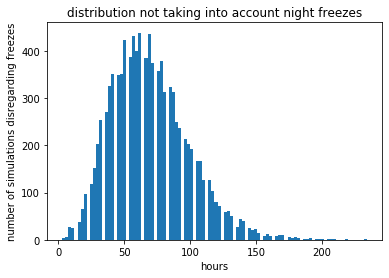

In [6]:
HOW_MANY_SIMULATION_RUNS = 10000

stats_array = np.array([])
outcomes = []
for i in range(0, HOW_MANY_SIMULATION_RUNS):
    outcomes.append( play_lock() )


import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

plt.hist(outcomes, 100)
plt.xlabel('hours')
plt.ylabel('number of simulations disregarding freezes')
plt.title('distribution not taking into account night freezes')
plt.show()


In [7]:

print('average duration of the lock is', np.mean(outcomes), 'hours')

average duration of the lock is 69.7479 hours


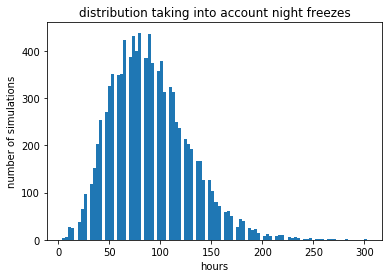

In [8]:
#As a final step, let's take into account the freezes at night

HOURS_OF_FREEZE_EVERY_NIGHT = 7
outcomes_with_freezes = [i * (24 + HOURS_OF_FREEZE_EVERY_NIGHT)/24 for i in outcomes]

plt.hist(outcomes_with_freezes, 100)
plt.xlabel('hours')
plt.ylabel('number of simulations')
plt.title('distribution taking into account night freezes')
plt.show()

In [9]:
print('average duration of the lock is', np.mean(outcomes_with_freezes), 'hours')

average duration of the lock is 90.0910375 hours
